In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Dropout,Dense,SpatialDropout1D,SimpleRNN
from keras.models import Sequential
from sklearn.metrics import roc_auc_score
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


[]


In [2]:
epochs=16
batchsize=128
pad_type=trunc_type='pre'
max_review_length=100  #RNNS are bad for long sequence length
n_dim=64
n_unique_words=10000
drop_embed=0.2
drop_rnn=0.2
n_rnn=256

In [3]:
(xtrain,ytrain),(xvalid,yvalid)=imdb.load_data(num_words=n_unique_words)

17465344/17464789 [==============================] - 2s 0us/step


In [4]:
xtrain[:2]   #each sequence is having character 1 as start of the sequence
print(type(xtrain))

<class 'numpy.ndarray'>


In [5]:
#length of first 20 sequences
[len(i) for i in xtrain[:20]]

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177]

In [7]:
xtrain1=pad_sequences(xtrain,maxlen=max_review_length,padding='pre',truncating='pre')
xvalid1=pad_sequences(xvalid,maxlen=max_review_length,padding='pre',truncating='pre')

In [8]:
[len(i) for i in xtrain1[:20]]

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100]

In [13]:
model=Sequential()
model.add(Embedding(n_unique_words,n_dim,input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn,dropout=drop_rnn))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [16]:
history1=model.fit(xtrain1,ytrain,batch_size=batchsize,epochs=epochs,verbose=1,validation_data=(xvalid1,yvalid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 26s 1ms/step - loss: 0.6935 - acc: 0.5237 - val_loss: 0.6711 - val_acc: 0.5526
Epoch 2/16
25000/25000 [==============================] - 26s 1ms/step - loss: 0.6177 - acc: 0.6466 - val_loss: 0.6573 - val_acc: 0.6058
Epoch 3/16
25000/25000 [==============================] - 26s 1ms/step - loss: 0.6013 - acc: 0.6702 - val_loss: 0.5852 - val_acc: 0.6858
Epoch 4/16
25000/25000 [==============================] - 26s 1ms/step - loss: 0.5130 - acc: 0.7474 - val_loss: 0.5601 - val_acc: 0.7601
Epoch 5/16
25000/25000 [==============================] - 25s 1ms/step - loss: 0.4164 - acc: 0.8185 - val_loss: 0.4368 - val_acc: 0.8059
Epoch 6/16
25000/25000 [==============================] - 26s 1ms/step - loss: 0.3654 - acc: 0.8445 - val_loss: 0.4720 - val_acc: 0.8115
Epoch 7/16
25000/25000 [==============================] - 26s 1ms/step - loss: 0.3199 - acc: 0.8685 - val_loss: 0.4623 - val_acc

Text(0,0.5,'accuracy')

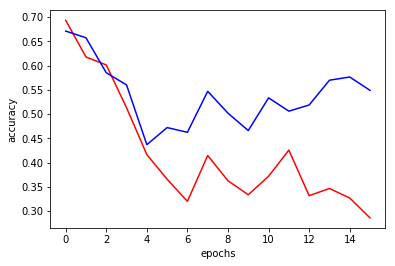

In [20]:
plt.plot(history1.history['loss'],'r')
plt.plot(history1.history['val_loss'],'b')
plt.xlabel('epochs')
plt.ylabel('accuracy')


In [25]:
#playing with hyperparameter
max_review_length=150 
xtrain2=pad_sequences(xtrain,maxlen=max_review_length,padding='pre',truncating='pre')
xvalid2=pad_sequences(xvalid,maxlen=max_review_length,padding='pre',truncating='pre')

In [26]:
model=Sequential()
model.add(Embedding(n_unique_words,n_dim,input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn,dropout=drop_rnn))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history2=model.fit(xtrain2,ytrain,batch_size=batchsize,epochs=epochs,verbose=1,validation_data=(xvalid2,yvalid))

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 38s 2ms/step - loss: 0.6593 - acc: 0.5821 - val_loss: 0.5953 - val_acc: 0.6636
Epoch 2/16
25000/25000 [==============================] - 38s 2ms/step - loss: 0.5030 - acc: 0.7586 - val_loss: 0.5487 - val_acc: 0.7165
Epoch 3/16
25000/25000 [==============================] - 38s 2ms/step - loss: 0.4064 - acc: 0.8232 - val_loss: 0.4067 - val_acc: 0.8213
Epoch 4/16
25000/25000 [==============================] - 38s 2ms/step - loss: 0.3330 - acc: 0.8641 - val_loss: 0.4393 - val_acc: 0.8323
Epoch 5/16
25000/25000 [==============================] - 38s 2ms/step - loss: 0.3686 - acc: 0.8463 - val_loss: 0.5967 - val_acc: 0.6774
Epoch 6/16
25000/25000 [==============================] - 38s 2ms/step - loss: 0.5244 - acc: 0.7334 - val_loss: 0.5750 - val_acc: 0.7004
Epoch 7/16
25000/25000 [==============================] - 38s 2ms/step - loss: 0.4370 - acc: 0.7981 - val_loss: 0.4660 - val_acc

Text(0,0.5,'accuracy')

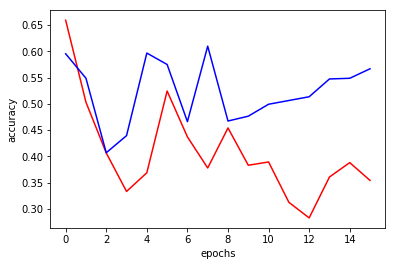

In [29]:
plt.plot(history2.history['loss'],'r')
plt.plot(history2.history['val_loss'],'b')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [ ]:
#Ideas we can try chaging the number of neurons in rnn layer too that is also a hyperparameter